# Graphical exploratory data analysis

Before diving into sophisticated statistical inference techniques, we should first explore our data by plotting them and computing simple summary statistics. This process, called **exploratory data analysis**, is a crucial first step in statistical analysis of data.

## Introduction to Exploratory Data Analysis

Exploratory Data Analysis is the process of organizing, plo!ing, and summarizing a data set

>“Exploratory data analysis can never be the
whole story, but nothing else can serve as the
foundation stone. ” > ~ John Tukey

### Tukey's comments on EDA

* Exploratory data analysis is detective work.
* There is no excuse for failing to plot and look.
* The greatest value of a picture is that it forces us to notice what we never expected to see.
* It is important to understand what you can do before you learn how to measure how well you seem to have done it.

> If you don't have time to do EDA, you really don't have time to do hypothesis tests. And you should always do EDA first.

### Advantages of graphical EDA

* It often involves converting tabular data into graphical form.
* If done well, graphical representations can allow for more rapid interpretation of data.
* There is no excuse for neglecting to do graphical EDA.

> While a good, informative plot can sometimes be the end point of an analysis, it is more like a beginning: it helps guide you in the quantitative statistical analyses that come next.

## Plotting a histogram

### Plotting a histogram of iris data

We will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is [available as part of scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Here, you will work with his measurements of petal length.

We will plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. 

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array `versicolor_petal_length`.

# Libraries

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Set default Seaborn style
sns.set()

%matplotlib inline

In [2]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

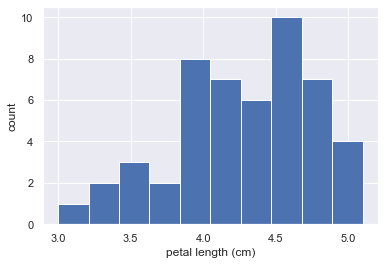

In [3]:
# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.ylabel("count")
plt.xlabel("petal length (cm)")
plt.show()

### Adjusting the number of bins in a histogram

The histogram we just made had ten bins. This is the default of matplotlib. 

>Tip: The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 

We will plot the histogram of _Iris versicolor petal lengths_ again, this time using the square root rule for the number of bins. You specify the number of bins using the `bins` keyword argument of `plt.hist()`.

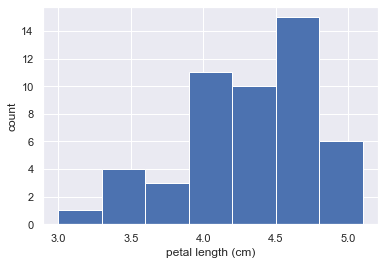

In [4]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## Plot all data: Bee swarm plots

### Bee swarm plot

We will make a bee swarm plot of the iris petal lengths. The x-axis will contain each of the three species, and the y-axis the petal lengths. 

In [5]:
iris_petal_lengths = pd.read_csv("../datasets/iris_petal_lengths.csv")
iris_petal_lengths.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_petal_lengths.shape

(150, 5)

In [7]:
iris_petal_lengths.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


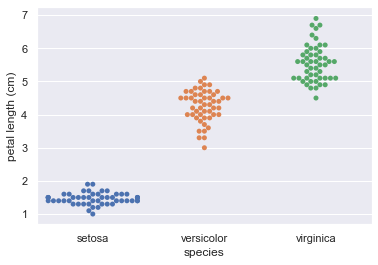

In [8]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(data=iris_petal_lengths, x="species", y="petal length (cm)")

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")
# Show the plot

plt.show()

### Interpreting a bee swarm plot

* _I. virginica_ petals tend to be the longest, and _I. setosa_ petals tend to be the shortest of the three species.

> Note: Notice that we said **"tend to be."** Some individual _I. virginica_ flowers may be shorter than individual _I. versicolor_ flowers. It is also possible that an individual _I. setosa_ flower may have longer petals than in individual _I. versicolor_ flower, though this is highly unlikely, and was not observed by Anderson.

## Plot all data: ECDFs

> Note: Empirical cumulative distribution function (ECDF)

### Computing the ECDF

We will write a function that takes as input a 1D array of data and then returns the `x` and `y` values of the ECDF.

> Important: ECDFs are among the most important plots in statistical analysis. 

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


### Plotting the ECDF

We will now use `ecdf()` function to compute the ECDF for the petal lengths of Anderson's _Iris versicolor_ flowers. We will then plot the ECDF.

> Warning: `ecdf()` function returns two arrays so we will need to unpack them. An example of such unpacking is `x, y = foo(data)`, for some function `foo()`.

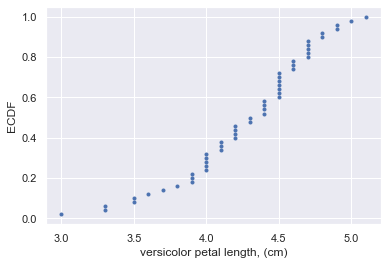

In [10]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")

# Label the axes
_ = plt.xlabel("versicolor petal length, (cm)")
_ = plt.ylabel("ECDF")

# Display the plot
plt.show()


### Comparison of ECDFs

ECDFs also allow us to compare two or more distributions ***(though plots get cluttered if you have too many)***. Here, we will plot ECDFs for the petal lengths of all three iris species. 

> Important: we already wrote a function to generate ECDFs so we can put it to good use!

In [11]:
setosa_petal_length = iris_petal_lengths["petal length (cm)"][iris_petal_lengths.species == "setosa"]
versicolor_petal_length = iris_petal_lengths["petal length (cm)"][iris_petal_lengths.species == "versicolor"]
virginica_petal_length = iris_petal_lengths["petal length (cm)"][iris_petal_lengths.species == "virginica"]
setosa_petal_length.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64

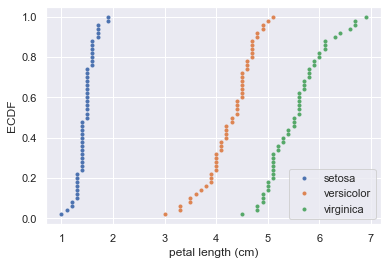

In [12]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker=".", linestyle="none")
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")
_ = plt.plot(x_virg, y_virg, marker=".", linestyle="none")

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

> Note: The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

## Onward toward the whole story!

> Important: “Exploratory data analysis can never be the
whole story, but nothing else can serve as the
foundation stone.”
 —John Tukey

# Quantitative exploratory data analysis

We will compute useful summary statistics, which serve to concisely describe salient features of a dataset with a few numbers.
 
## Introduction to summary statistics: The sample mean and median

$$
mean = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

> ### Outliers
● Data points whose value is far greater or less than
most of the rest of the data


> ### The median
● The middle value of a data set

> Note: An outlier can significantly affect the value of the mean, but not the median

### Computing means

The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using `np.mean()`.

In [13]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Percentiles, outliers, and box plots

### Computing percentiles

 We will compute the percentiles of petal length of _Iris versicolor_.

In [14]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

### Comparing percentiles to ECDF

To see how the percentiles relate to the ECDF, we will plot the percentiles of _Iris versicolor_ petal lengths on the ECDF plot.

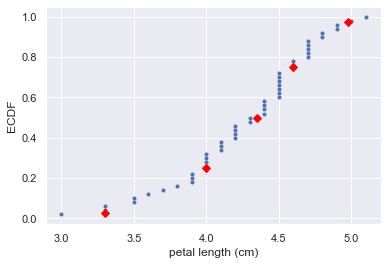

In [15]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle="none")

# Show the plot
plt.show()


### Box-and-whisker plot

> Warning: Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine.

We will Make a box plot of the iris petal lengths.

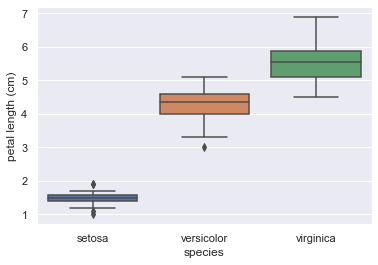

In [16]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(data=iris_petal_lengths, x="species", y="petal length (cm)")

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

# Show the plot
plt.show()


## Variance and standard deviation

> ### Variance
● The mean squared distance of the data from their
mean

> Tip: Variance; nformally, a measure of the spread of data
> $$
variance = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

> ### standard Deviation
$$
std = \sqrt {\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

### Computing the variance

we will explicitly compute the variance of the petal length of _Iris veriscolor_, we will then use `np.var()` to compute it.

In [17]:
# Array of differences to mean: differences
differences = versicolor_petal_length-np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


### The standard deviation and the variance

the standard deviation is the square root of the variance.

In [18]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Covariance and the Pearson correlation coefficient

> ### Covariance
● A measure of how two quantities vary together
> $$
covariance = \frac{1}{n} \sum_{i=1}^{n} (x_i\ \bar{x})\ (y_i \ - \bar{y})
$$

> ### Pearson correlation coefficient
> $$
\rho = Pearson\ correlation = \frac{covariance}{(std\ of\ x)\ (std\ of\ y)} = \frac{variability\ due\ to\ codependence}{independent variability}
$$

### Scatter plots

When we made bee swarm plots, box plots, and ECDF plots in previous exercises, we compared the petal lengths of different species of _iris_. But what if we want to compare two properties of a single species? This is exactly what we will do, we will make a **scatter plot** of the petal length and width measurements of Anderson's _Iris versicolor_ flowers. 

> Important: If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

In [19]:
versicolor_petal_width = np.array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

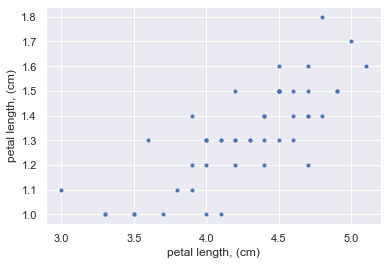

In [20]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker=".", linestyle="none")


# Label the axes
_ = plt.xlabel("petal length, (cm)")
_ = plt.ylabel("petal length, (cm)")

# Show the result
plt.show()

> Tip: we see some correlation. Longer petals also tend to be wider.

### Computing the covariance

The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data $x$ and $y$, `np.cov(x, y)` returns a 2D array where entries `[0,1`] and `[1,0]` are the covariances. Entry `[0,0]` is the variance of the data in `x`, and entry `[1,1]` is the variance of the data in `y`. This 2D output array is called the **covariance matrix**, since it organizes the self- and covariance.

In [21]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance

print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient

the Pearson correlation coefficient, also called the **Pearson r**, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov(`), it takes two arrays as arguments and returns a 2D array. Entries `[0,0]` and `[1,1]` are necessarily equal to `1`, and the value we are after is entry `[0,1]`.

We will write a function, `pearson_r(x, y)` that takes in two arrays and returns the Pearson correlation coefficient. We will then use this function to compute it for the petal lengths and widths of $I.\ versicolor$.

In [22]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# Thinking probabilistically-- Discrete variables

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. We will think probabilistically about discrete quantities: those that can only take certain values, like integers.

## Probabilistic logic and statistical inference

### the goal of statistical inference

* To draw probabilistic conclusions about what we might expect if we collected the same data again.
* To draw actionable conclusions from data.
* To draw more general conclusions from relatively few data or observations.

> Note: Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

### Why we use the probabilistic language in statistical inference

* Probability provides a measure of uncertainty and this is crucial because we can quantify what we might expect if the data were acquired again.
* Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary. We need probability to say how data might vary if acquired again.

> Note: Probabilistic language is in fact very precise. It precisely describes uncertainty.

## Random number generators and hacker statistics

> ### Hacker statistics
- Uses simulated repeated measurements to compute
probabilities.

> ### The np.random module
- Suite of functions based on random number generation
- `np.random.random()`: draw a number between $0$ and $1$
 
> ### Bernoulli trial
● An experiment that has two options,
"success" (True) and "failure" (False).

> ### Random number seed
- Integer fed into random number generating algorithm
- Manually seed random number generator if you need reproducibility
- Specified using `np.random.seed()`

> ### Hacker stats probabilities
- Determine how to simulate data
- Simulate many many times
- Probability is approximately fraction of trials with the outcome of interest

### Generating random numbers using the np.random module

we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

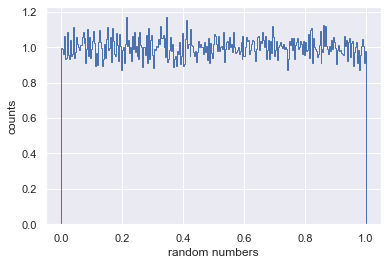

In [23]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers, bins=316, histtype="step", density=True)
_ = plt.xlabel("random numbers")
_ = plt.ylabel("counts")
# Show the plot
plt.show()

> Note: The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

### The np.random module and Bernoulli trials

> Tip: You can think of a Bernoulli trial as a flip of a possibly biased coin. Each coin flip has a probability $p$ of landing heads (success) and probability $1−p$ of landing tails (failure). 

We will write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability $p$ of success. To perform each Bernoulli trial, we will use the `np.random.random()` function, which returns a random number between zero and one.

In [24]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = False

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?

Let's say a bank made 100 mortgage loans. It is possible that anywhere between $0$ and $100$ of the loans will be defaulted upon. We would like to know the probability of getting a given number of defaults, given that the probability of a default is $p = 0.05$. To investigate this, we will do a simulation. We will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function and record how many defaults we get. Here, a success is a default. 

> Important: Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default? 

You will do this for another $100$ Bernoulli trials. And again and again until we have tried it $1000$ times. Then, we will plot a histogram describing the probability of the number of defaults.



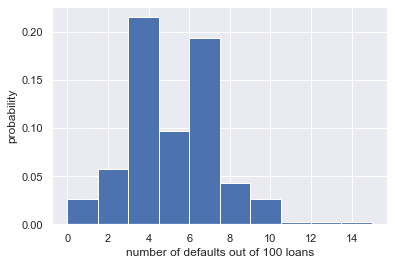

In [25]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


> Warning: This is actually not an optimal way to plot a histogram when the results are known to be integers. We will revisit this

### Will the bank fail?

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

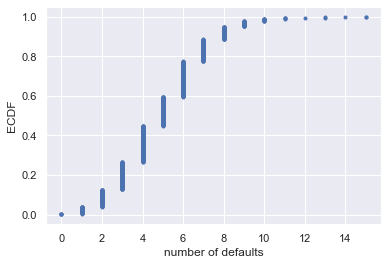

Probability of losing money = 0.022


In [26]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x,y, marker=".", linestyle="none")
_ = plt.xlabel("number of defaults")
_ = plt.ylabel("ECDF")

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

> Note: we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

## Probability distributions and stories: The Binomial distribution

> ### Probability mass function (PMF)
- The set of probabilities of discrete outcomes

> ### Probability distribution
- A mathematical description of outcomes

> ### Discrete Uniform distribution: the story
- The outcome of rolling a single fair die is Discrete Uniformly distributed.

> ### Binomial distribution: the story
- The number $r$ of successes in $n$ Bernoulli trials with
probability $p$ of success, is Binomially distributed
- The number $r$ of heads in $4$ coin flips with probability
$0.5$ of heads, is Binomially distributed

### Sampling out of the Binomial distribution

We will compute the probability mass function for the number of defaults we would expect for $100$ loans as in the last section, but instead of simulating all of the Bernoulli trials, we will perform the sampling using `np.random.binomial()`{% fn 1 %}.

> Note: This is identical to the calculation we did in the last set of exercises using our custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. 

Given this extra efficiency, we will take $10,000$ samples instead of $1000$. After taking the samples, we will plot the CDF. This CDF that we are plotting is that of the Binomial distribution.

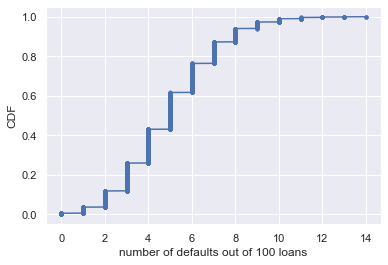

In [27]:
# Take 10,000 samples out of the binomial distribution: n_defaults

n_defaults = np.random.binomial(100, 0.05, size=10000)
# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y, marker=".", linestyle="-")
_ = plt.xlabel("number of defaults out of 100 loans")
_ = plt.ylabel("CDF")

# Show the plot
plt.show()


> Tip: If you know the story, using built-in algorithms to directly sample out of the distribution is ***much*** faster.

### Plotting the Binomial PMF

> Warn: plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here.

we will plot the PMF of the Binomial distribution as a histogram. The trick is setting up the edges of the `bins` to pass to `plt.hist()` via the `bins` keyword argument. We want the bins centered on the integers. So, the edges of the bins should be $-0.5, 0.5, 1.5, 2.5, ...$ up to `max(n_defaults) + 1.5`. We can generate an array like this using `np.arange() `and then subtracting `0.5` from the array.

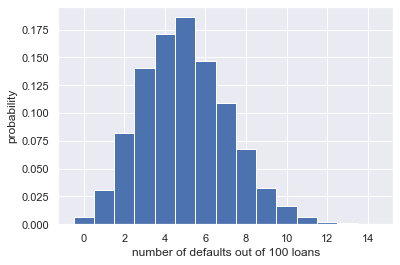

In [28]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel("number of defaults out of 100 loans")
_ = plt.ylabel("probability")

# Show the plot
plt.show()

## Poisson processes and the Poisson distribution

> ### Poisson process
- The timing of the next event is completely independent of when the previous event happened

> ### Examples of Poisson processes
- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville

> ### Poisson distribution
- The number $r$ of arrivals of a Poisson process in a
given time interval with average rate of $λ$ arrivals
per interval is Poisson distributed.
- The number r of hits on a website in one hour with
an average hit rate of 6 hits per hour is Poisson
distributed.

> ### Poisson Distribution
- Limit of the Binomial distribution for low
probability of success and large number of trials.
- That is, for rare events.

### Relationship between Binomial and Poisson distributions

> Important: Poisson distribution is a limit of the Binomial distribution for rare events.

> Tip: Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. We will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of $10$. Then, we will compute the mean and standard deviation of samples from a Binomial distribution with parameters $n$ and $p$ such that $np = 10$.

In [29]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [.5, .1, .01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


> Note: The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability $p$ gets lower and lower.

### Was 2015 anomalous?

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. The  probability distribution that would be appropriate to describe the number of no-hitters we would expect in a given season? is Both Binomial and Poisson, though Poisson is easier to model and compute.

> Important: When we have rare events (low $p$, high $n$), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average $\frac{251}{115}$ no-hitters per season, what is the probability of having seven or more in a season? Let's find out


In [30]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


> Note: The result is about $0.007$. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

# Thinking probabilistically-- Continuous variables

It’s time to move onto continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. We will be speaking the probabilistic language needed to launch into the inference techniques.

## Probability density functions

> ### Continuous variables
- Quantities that can take any value, not just
discrete values

> ### Probability density function (PDF)
- Continuous analog to the PMF
- Mathematical description of the relative likelihood
of observing a value of a continuous variable

## Introduction to the Normal distribution

> ### Normal distribution
- Describes a continuous variable whose PDF has a single symmetric peak.

>|Parameter| |Calculated from data|
|---|---|---|
|mean of a Normal distribution|≠| mean computed from data|
|st. dev. of a Normal distribution|≠|standard deviation computed from data|

### The Normal PDF

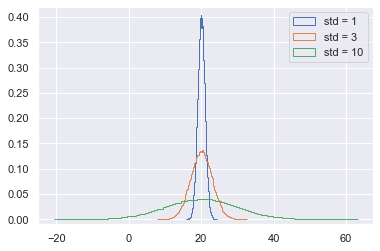

In [32]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, density=True, histtype="step", bins=100)
_ = plt.hist(samples_std3, density=True, histtype="step", bins=100)
_ = plt.hist(samples_std10, density=True, histtype="step", bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


> Note: You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

### The Normal CDF



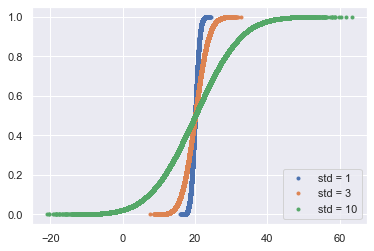

In [33]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker=".", linestyle="none")
_ = plt.plot(x_std3, y_std3, marker=".", linestyle="none")
_ = plt.plot(x_std10, y_std10, marker=".", linestyle="none")
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


> Note: The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

## The Normal distribution: Properties and warnings

### Are the Belmont Stakes results Normally distributed?

Since 1926, the Belmont Stakes is a $1.5$ mile-long race of 3-year old thoroughbred horses. <a href="https://en.wikipedia.org/wiki/Secretariat_(horse)">Secretariat</a> ran the fastest Belmont Stakes in history in $1973$. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, we will compute the mean and standard deviation of the Belmont winners' times. We will sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a CDF. Overlay the ECDF from the winning Belmont times {% fn 2 %}.


In [34]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

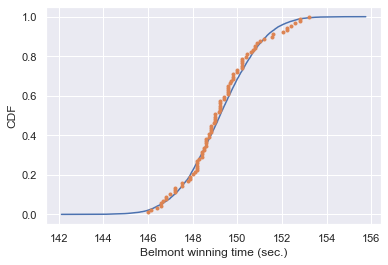

In [35]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


> Note: The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

### What are the chances of a horse matching or beating Secretariat's record?

The probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat assuming that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed)

In [36]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples<=144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000614


> Note: We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

## The Exponential distribution

The waiting time between arrivals of a Poisson process is Exponentially distributed

> ### Possible Poisson process
- Nuclear incidents:
     - Timing of one is independent of all others
     
$f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$
     
### If you have a story, you can simulate it!

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it.

we looked at the rare event of no-hitters in Major League Baseball. _Hitting the cycle_ is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

> Important: We will write a function to sample out of the distribution described by this story.

In [37]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

### Distribution of no-hitters and cycles

We'll use the sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is $764$ games, and the mean waiting time for hitting the cycle is $715$ games.

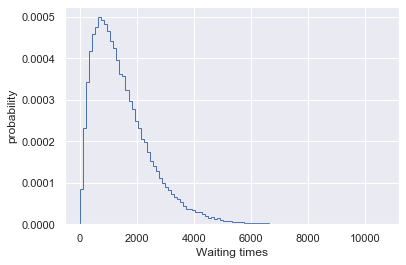

In [39]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype="step")
# Label axes
_ = plt.xlabel("Waiting times")
_ = plt.ylabel("probability")

# Show the plot
plt.show()


Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), Let's also plot the CDF.

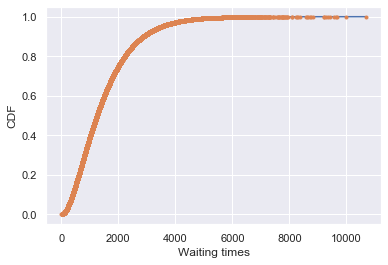

In [41]:
x,y = ecdf(waiting_times)
_ = plt.plot(x,y)
_ = plt.plot(x,y, marker=".", linestyle="none")
_ = plt.xlabel("Waiting times")
_ = plt.ylabel("CDF")
plt.show()

{{'> Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with `np.random.seed(42))` to save you typing that each time.' | fndetail: 1 }}
{{'> Note: we scraped the data concerning the Belmont Stakes from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).' | fndetail: 2 }}